## WeatherPy 
-----
What's the weather like as we approach the equator? 

Using Python requests, APIs, and JSON traversals we generated 500+ random latitudes and longitudes with the [Citypy Python library](https://pypi.python.org/pypi/citipy) and the [OpenWeatherMap API](https://openweathermap.org/api), with API keys to retrieve and graph scatter plots to showcase the following relationships:

* Latitude vs. Temperature (F) 
* Latitude vs. Humidity (%)
* Latitude vs. Cloudiness (%)
* Latitude vs. Wind Speed (mph)
* Latitude vs. Longitude (for fun and to see the distribution of the data)

### Analysis
----
 - Ta-da! As one would expect as you approach the equator the temperature increases. 
 - During the end of the calendar year, i.e., November, the temperature is cooler in the Northern hemisphere, where latitudes are greater than 0 and the temperature is warmer in the Southern hemisphere, where latitudes are less than 0.
 - There was no relationship between latitude and humidity, cloudiness and wind speed. However, the data suggest that there are more cities with a relative humidity greater than 50% and wind speed less than 15 mph, which would be an interesting analysis. 

In [8]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from random import uniform
from config import api_key

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

## Generate Cites List from Lats and Longs

In [9]:
# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      705
City       705
Country    705
dtype: int64

## Perform API Calls

In [10]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Kloulklubed PW
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kloulklubed
City not found, skipping...
------------------------
Proceesing: City #  2  |  Ancud CL
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ancud
City not found, skipping...
------------------------
Proceesing: City #  3  |  Pitimbu BR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=pitimbu
City not found, skipping...
------------------------
Proceesing: City #  4  |  Tuktoyaktuk CA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=tuktoyaktuk
------------------------
Proceesing: City #  5  |  Itaituba BR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=itaituba
------------

------------------------
Proceesing: City #  45  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=atuona
------------------------
Proceesing: City #  46  |  Bluff NZ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=bluff
------------------------
Proceesing: City #  47  |  Turan VN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=danang
------------------------
Proceesing: City #  48  |  Bethel US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=bethel
------------------------
Proceesing: City #  49  |  Nanortalik GL
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=nanortalik
------------------------
Proceesing: City #  50  |  Ilulissat GL
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437

------------------------
Proceesing: City #  90  |  Stornoway GB
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=stornoway
------------------------
Proceesing: City #  91  |  Nishihara JP
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=nishihara
City not found, skipping...
------------------------
Proceesing: City #  92  |  Barrow US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=barrow
------------------------
Proceesing: City #  93  |  Longyearbyen SJ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=longyearbyen
------------------------
Proceesing: City #  94  |  Menongue AO
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=menongue
------------------------
Proceesing: City #  95  |  Mehamn NO
http://api.openweather

------------------------
Proceesing: City #  135  |  Ahipara NZ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ahipara
------------------------
Proceesing: City #  136  |  Gushikawa JP
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=gushikawa
City not found, skipping...
City not found, skipping...
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  137  |  Kruisfontein ZA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kruisfontein
City not found, skipping...
------------------------
Proceesing: City #  138  |  Turukhansk RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=turukhansk
------------------------
Proceesing: City #  139  |  Manzhouli CN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b655

------------------------
Proceesing: City #  178  |  Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=saskylakh
City not found, skipping...
------------------------
Proceesing: City #  179  |  Hashtrud IR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=hashtrud
------------------------
Proceesing: City #  180  |  Esperance AU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=esperance
City not found, skipping...
------------------------
Proceesing: City #  181  |  Sanary-sur-Mer FR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=sanary-sur-mer
------------------------
Proceesing: City #  182  |  Khash IR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=khash
------------------------
Proceesing: City #  183 

------------------------
Proceesing: City #  223  |  Ostrovnoy RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ostrovnoy
City not found, skipping...
------------------------
Proceesing: City #  224  |  Warwick US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=warwick
City not found, skipping...
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  225  |  Gasa BT
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=gasa
------------------------
Proceesing: City #  226  |  Udachnyy RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=udachnyy
------------------------
Proceesing: City #  227  |  Derzhavinsk KZ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=derzhavinsk
-----

------------------------
Proceesing: City #  268  |  Taga RO
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=taga
City not found, skipping...
------------------------
Proceesing: City #  269  |  Buala SB
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=buala
------------------------
Proceesing: City #  270  |  Shingu JP
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=shingu
------------------------
Proceesing: City #  271  |  Dwarka IN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=dwarka
------------------------
Proceesing: City #  272  |  Sibolga ID
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=sibolga
------------------------
Proceesing: City #  273  |  Taoudenni ML
http://api.openweathermap.org/data/2.5/weathe

City not found, skipping...
------------------------
Proceesing: City #  313  |  Vangaindrano MG
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=vangaindrano
------------------------
Proceesing: City #  314  |  Bowen AU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=bowen
------------------------
Proceesing: City #  315  |  Pyt-Yakh RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=sentyabrskiy
------------------------
Proceesing: City #  316  |  Merauke ID
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=merauke
------------------------
Proceesing: City #  317  |  Tiznit MA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=tiznit
------------------------
Proceesing: City #  318  |  Natal BR
http://api.openweathermap

City not found, skipping...
------------------------
Proceesing: City #  359  |  Littleton US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=littleton
------------------------
Proceesing: City #  360  |  Opuwo NA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=opuwo
------------------------
Proceesing: City #  361  |  Vanimo PG
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=vanimo
------------------------
Proceesing: City #  362  |  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=hualmay
------------------------
Proceesing: City #  363  |  Jacareacanga BR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=jacareacanga
City not found, skipping...
------------------------
Proceesing: City #  364  |  Pevek RU

City not found, skipping...
------------------------
Proceesing: City #  405  |  Abay KZ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=abay
------------------------
Proceesing: City #  406  |  Cidreira BR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=cidreira
------------------------
Proceesing: City #  407  |  Yumen CN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=yumen
------------------------
Proceesing: City #  408  |  Meulaboh ID
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=meulaboh
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  409  |  Ahuimanu US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ahuimanu
------------------------
Proceesing: City #  

------------------------
Proceesing: City #  449  |  Hobyo SO
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=hobyo
------------------------
Proceesing: City #  450  |  Kabanjahe ID
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kabanjahe
------------------------
Proceesing: City #  451  |  Andenes NO
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=andenes
------------------------
Proceesing: City #  452  |  Kupang ID
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kupang
------------------------
Proceesing: City #  453  |  South Shields GB
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=urfa
------------------------
Proceesing: City #  454  |  Kodinsk RU
http://api.openweathermap.org/data/2.5/weather?appid=72507af

------------------------
Proceesing: City #  495  |  Ouesso CG
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ouesso
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  496  |  Grand-Lahou CI
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=grand-lahou
------------------------
Proceesing: City #  497  |  Kajaani FI
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kajaani
------------------------
Proceesing: City #  498  |  Gladstone AU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=gladstone
------------------------
Proceesing: City #  499  |  Iwanai JP
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=iwanai
------------------------
Proceesing: City #  500  |  Ormara P

In [11]:
clean_cities_df.count()

City                531
Country             531
Temperature (F)     531
Latitude            531
Longitude           531
Humidity (%)        531
Cloudiness (%)      531
Wind Speed (mph)    531
dtype: int64

In [12]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kloulklubed,PW,75.2,7.04,134.26,100,90,9.95
1,Ancud,CL,54.69,-41.87,-73.82,65,68,7.16
2,Pitimbu,BR,84.2,-7.47,-34.81,58,20,11.41
3,Tuktoyaktuk,CA,-14.81,69.45,-133.04,75,20,3.36
4,Itaituba,BR,91.4,-4.28,-55.98,55,20,3.36
5,Anda,CN,1.81,46.4,125.32,69,0,9.28
6,Albany,US,37.4,42.65,-73.76,47,20,13.87
7,Ushuaia,AR,48.2,-54.8,-68.3,42,20,28.86
8,Carnarvon,AU,70.93,-24.87,113.63,98,80,13.87
9,Labuhan,ID,80.7,-6.88,112.21,100,76,9.84


In [13]:
# Save data to a CSV file
clean_cities_df.to_csv("WeatherPy_analysis/City_Data.csv")

## Latitude vs. Temperature 

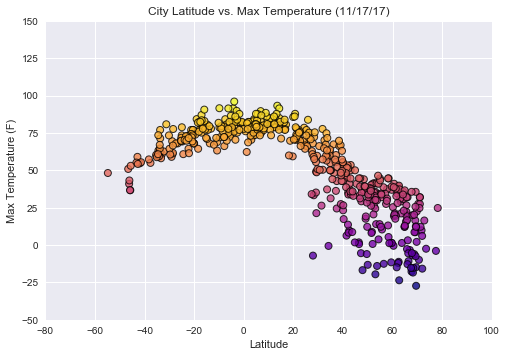

In [15]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Max Temperature (11/17/17)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 150])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity (%) 

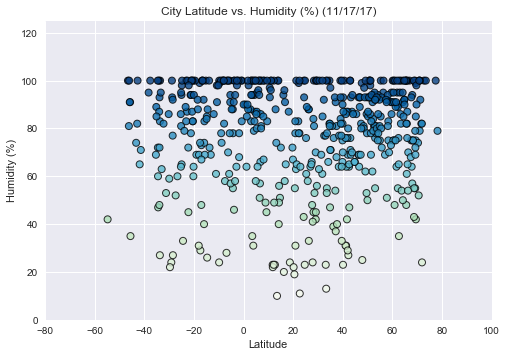

In [16]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Humidity (%) (11/17/17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness (%) 

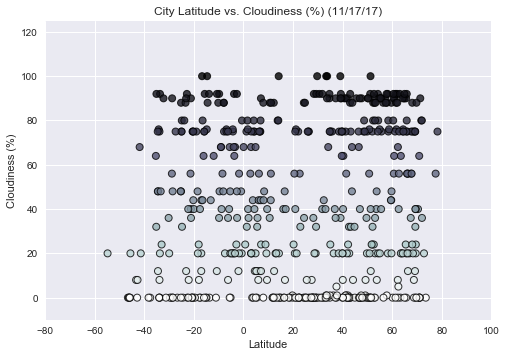

In [17]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Cloudiness (%) (11/17/17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed (mph)

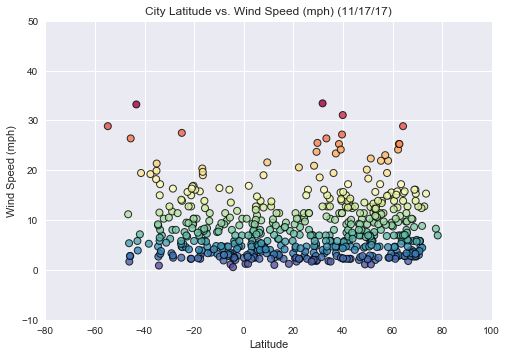

In [18]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Wind Speed (mph) (11/17/17)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()

## Latitude vs. Longitude

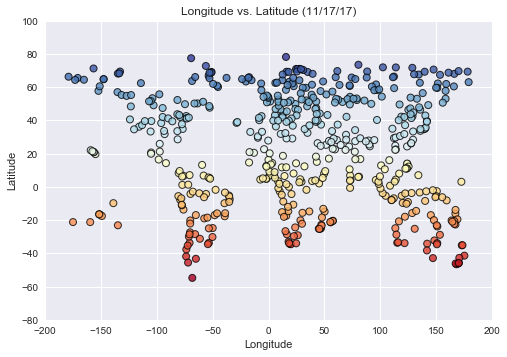

In [19]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("Longitude vs. Latitude (11/17/17)")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Longitude.png")

# Show plot
plt.show()